<a href="https://colab.research.google.com/github/Udit-dutta/Udit-dutta/blob/main/DigitClassificationDL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)

In [2]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(x_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [6]:
print(x_train[9].shape)

(28, 28)


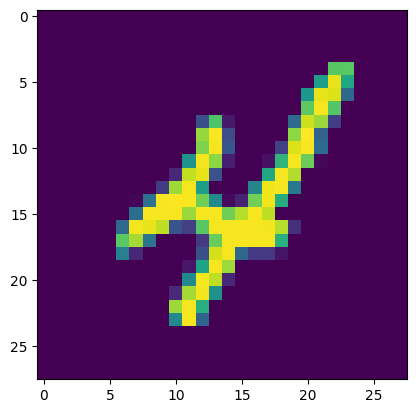

4


In [7]:
plt.imshow(x_train[9])
plt.show()
print(y_train[9])

In [8]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


We can also use One Hot Encoding


Now Normalize the data

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
print(x_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building Neural Network

In [12]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])

In [13]:
model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2962 - accuracy: 0.9097
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1357 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1013 - accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0829 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0693 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0583 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0522 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0438 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0414 - accuracy: 0.9864
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.03

In [15]:
loss,accuracy= model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9723


<function matplotlib.pyplot.show(close=None, block=None)>

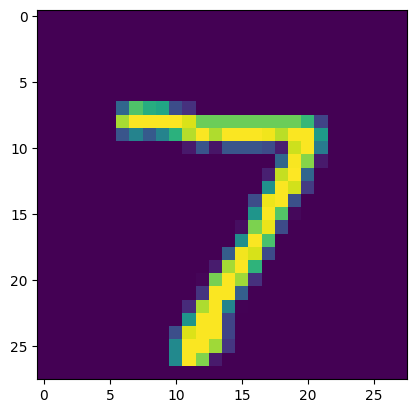

In [16]:
plt.imshow(x_test[0])
plt.show

In [17]:
print(y_test[0])

7


In [18]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(y_pred.shape)

(10000, 10)


In [20]:
print(y_pred[0])

[7.7979692e-04 6.3191897e-01 5.8404875e-01 9.7217655e-01 1.6375842e-03
 1.1606921e-01 2.8392583e-07 9.9999881e-01 2.3786339e-03 2.8931400e-01]


In [21]:
label_for_first_data=np.argmax(y_pred[0])


In [22]:
print(label_for_first_data)

7


In [23]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [24]:
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [25]:
y_labels=[i for i in y_test]
print(y_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [26]:
conf_mat= confusion_matrix(y_test,y_pred_labels)

In [27]:
print(conf_mat)

tf.Tensor(
[[ 968    0    3    2    0    2    2    1    2    0]
 [   0 1126    2    1    0    2    1    0    3    0]
 [   2    2 1010    5    1    0    2    5    5    0]
 [   0    0    5  979    0    8    0    9    8    1]
 [   0    0    7    1  959    3    5    2    2    3]
 [   6    0    1   10    2  866    1    1    5    0]
 [   7    1    1    1    7   10  928    1    2    0]
 [   1    4   12    4    0    0    0 1004    1    2]
 [   3    0    6    8    4   11    0    7  934    1]
 [   2    3    1    5   16    9    0   11   13  949]], shape=(10, 10), dtype=int32)


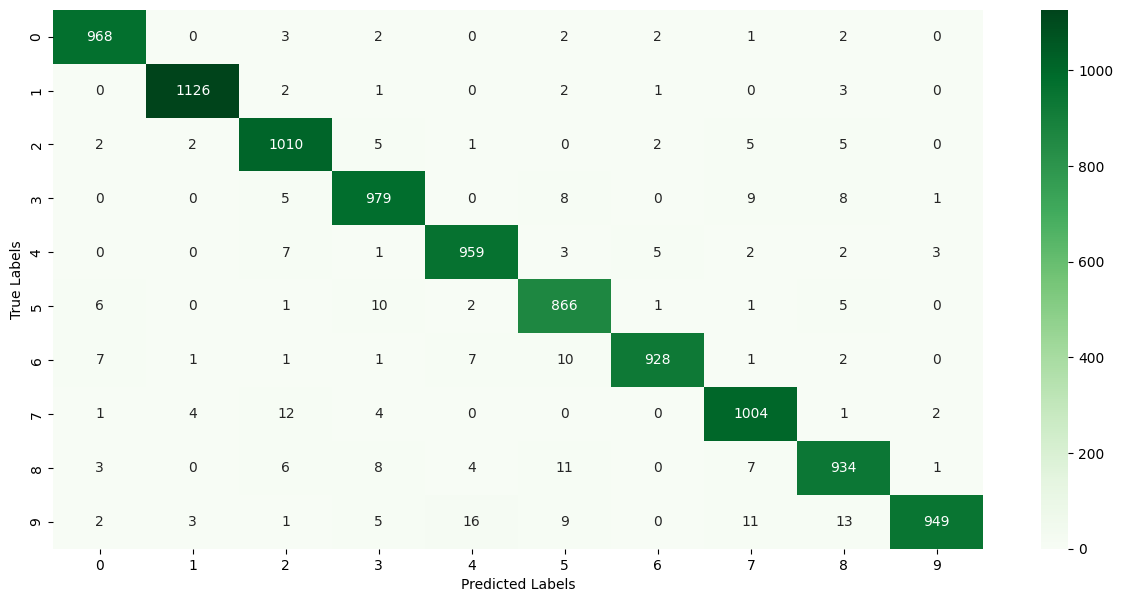

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

Building a predictive system.

In [44]:
input_image_path='/content/images (1).png'
input_image=cv2.imread(input_image_path)

In [45]:
print(input_image)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[11 11 11]
  [34 34 34]
  [34 34 34]
  ...
  [34 34 34]
  [34 34 34]
  [22 22 22]]]


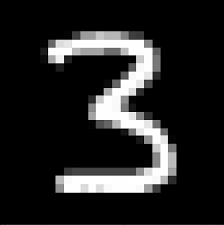

In [46]:
cv2_imshow(input_image)

In [47]:
input_image.shape

(225, 224, 3)

Now we have to resize it and change it into gray scale image.

In [48]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [49]:
image_resize=cv2.resize(grayscale,(28,28))

In [50]:
cv2_imshow(image_resize)

In [51]:
image_resize=image_resize/255

In [52]:
image_reshape=np.reshape(image_resize,[1,28,28,1])

In [53]:
input_prediction=model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[1.3881470e-09 3.5183114e-04 5.6237750e-02 1.0000000e+00 2.7973303e-05
  4.2379256e-03 1.0122568e-11 9.3190486e-09 9.9238092e-01 5.5447817e-02]]


In [54]:
input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)

3


**PREDICTIVE SYSTEM**

Path of the image to be predicted/content/images.png


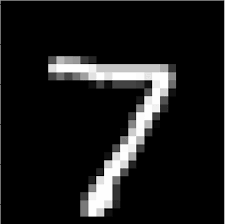

1/1 [==============================] - 0s 21ms/step
7


In [56]:
input_image_path=input("Path of the image to be predicted")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
image_resize=cv2.resize(grayscale,(28,28))
cv2_imshow(image_resize)
image_resize=image_resize/255
image_reshape=np.reshape(image_resize,[1,28,28,1])
input_prediction=model.predict(image_reshape)
input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)